[View in Colaboratory](https://colab.research.google.com/github/sqlwu/ML/blob/master/Neural_Network.ipynb)

In [1]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [0]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

'''
再依每一層(Keras 稱為 Dense)的特性及需求，指定 Activation Function，例如第16行，Input Layer至Hidden Layer，
我們排除負值，採用『relu』， Hidden Layer 至 Output Layer 使用『softmax』，求取每一個數字(0~9)的預測機率。
kernel_initializer='normal'，表示梯度下降求解的起始值，這裡選擇使用『常態分配』的亂數值，請參考 https://keras.io/initializers/ ，
起始值選擇不佳，可能會影響求解的速度與答案，通常不要選太奇怪的值就好。
'''

In [0]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

In [5]:
# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.7898 - acc: 0.8069 - val_loss: 0.3282 - val_acc: 0.9096
Epoch 2/10
 - 1s - loss: 0.3014 - acc: 0.9160 - val_loss: 0.2526 - val_acc: 0.9311
Epoch 3/10
 - 1s - loss: 0.2391 - acc: 0.9332 - val_loss: 0.2130 - val_acc: 0.9413
Epoch 4/10
 - 1s - loss: 0.1986 - acc: 0.9442 - val_loss: 0.1808 - val_acc: 0.9501
Epoch 5/10
 - 1s - loss: 0.1671 - acc: 0.9534 - val_loss: 0.1619 - val_acc: 0.9553
Epoch 6/10
 - 1s - loss: 0.1444 - acc: 0.9591 - val_loss: 0.1457 - val_acc: 0.9587
Epoch 7/10
 - 1s - loss: 0.1254 - acc: 0.9655 - val_loss: 0.1350 - val_acc: 0.9609
Epoch 8/10
 - 1s - loss: 0.1118 - acc: 0.9689 - val_loss: 0.1252 - val_acc: 0.9633
Epoch 9/10
 - 1s - loss: 0.0991 - acc: 0.9729 - val_loss: 0.1209 - val_acc: 0.9655
Epoch 10/10
 - 1s - loss: 0.0894 - acc: 0.9757 - val_loss: 0.1117 - val_acc: 0.9663


In [6]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 44us/step
()
	[Info] Accuracy of testing data = 97.0%


In [7]:
# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

[7 2 1 0 4 1 4 9 6 9]


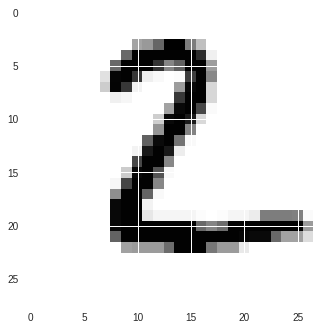

In [9]:
# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(X_test[1])
plt.show() 

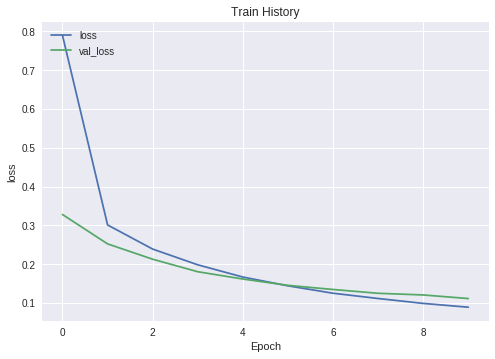

In [10]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 